In [1]:
# Download ckpt
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2026-01-19 11:13:00--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.185.82, 13.227.185.53, 13.227.185.31, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.185.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M  9.66MB/s    in 47s     

2026-01-19 11:13:50 (7.58 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [2]:
from glob import glob
import random

from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
sam

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [4]:
mask_generator = SamAutomaticMaskGenerator(sam)
mask_generator

In [5]:
image_paths = glob('test_images/*.jpg')
image_paths

['test_images/test_image_3.jpg',
 'test_images/test_image_2.jpg',
 'test_images/test_image_1.jpg']

In [6]:
image = cv2.imread(image_paths[random.randint(0, len(image_paths) - 1)])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(2560, 1920, 3)

In [7]:
masks = mask_generator.generate(image)
len(masks), masks[0].keys()

(94,
 dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box']))

In [8]:
masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
       shape=(2560, 1920)),
 'area': 5169,
 'bbox': [906, 1771, 77, 83],
 'predicted_iou': 0.9915242195129395,
 'point_coords': [[930.0, 1800.0]],
 'stability_score': 0.9873198866844177,
 'crop_box': [0, 0, 1920, 2560]}

In [9]:
def show_anns(anns):
    if len(anns) == 0:
        return

    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

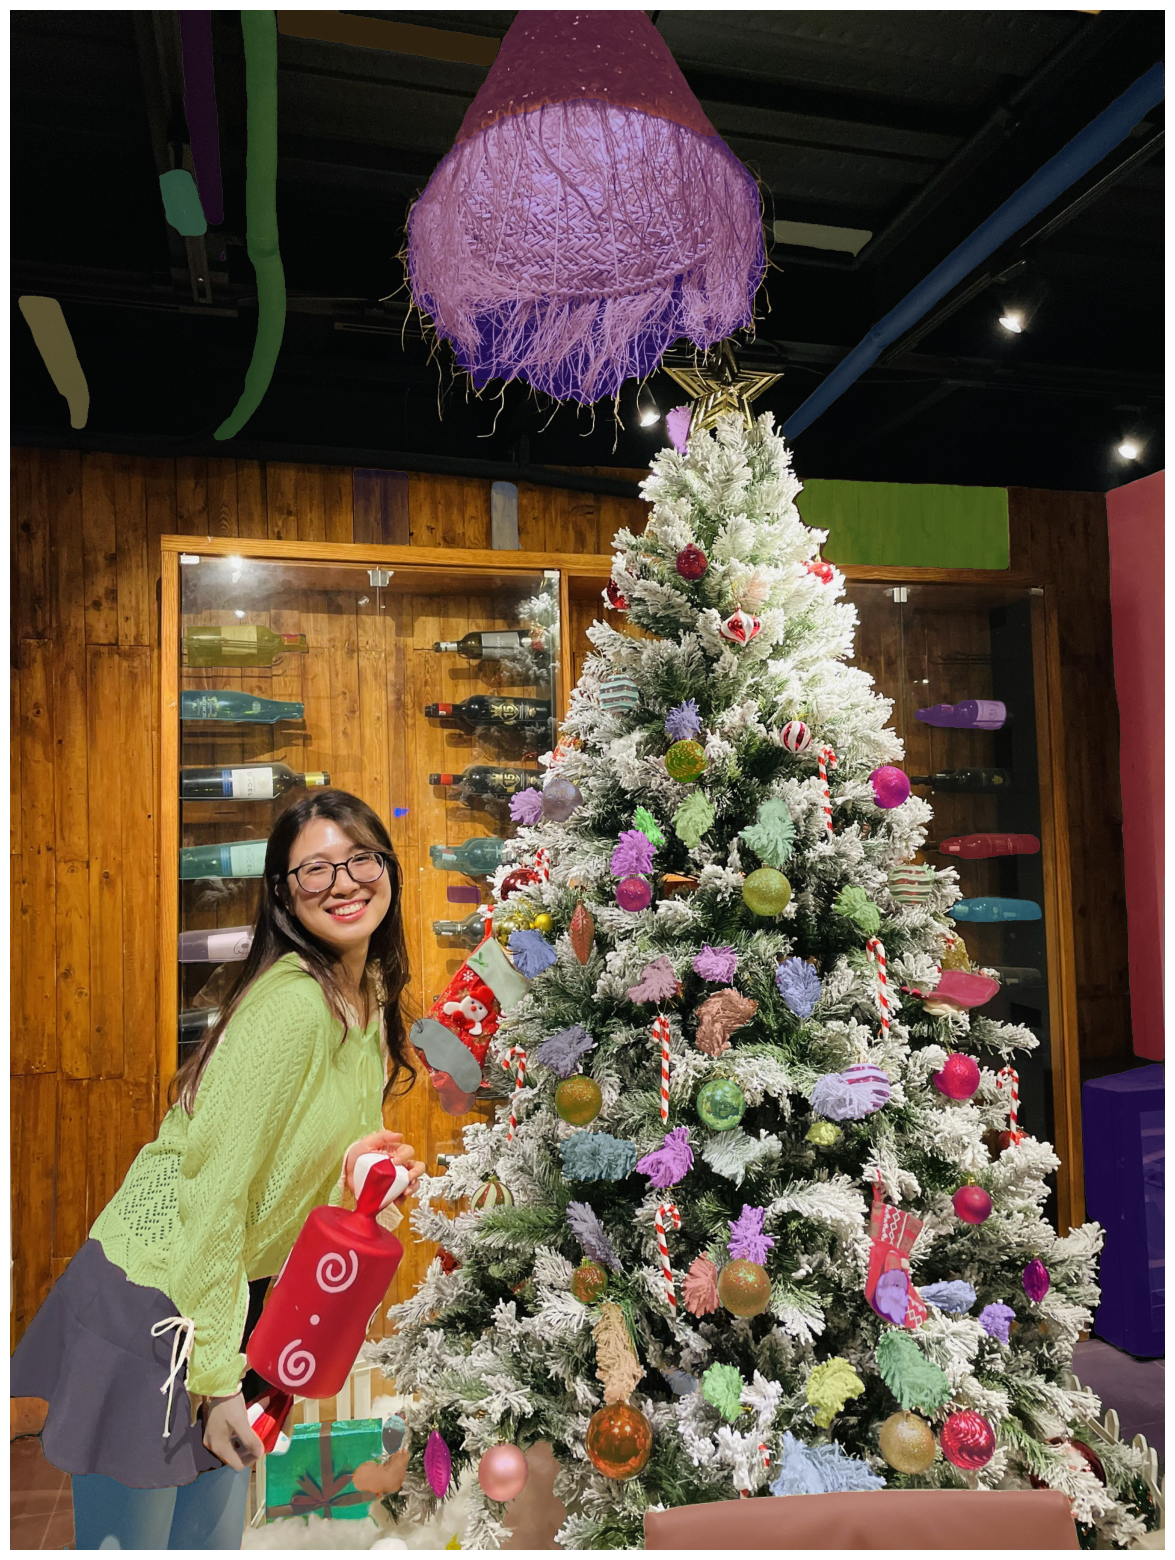

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()